In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
type(lat_lngs)

zip

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# Note this weird thing aboug this zip object, after you move it into a list or print it or into a dict, it becomes empty?

In [5]:
# Here this will not print anything, but if we move it to the step above, it will work but then the list in coordinates will be empty
for lat, lngs in lat_lngs:
    print(lat,lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [8]:
cities

['east london',
 'krasnoselkup',
 'lakes entrance',
 'sitka',
 'punta arenas',
 'kidal',
 'rikitea',
 'kapaa',
 'kaitangata',
 'upernavik',
 'ushuaia',
 'torbay',
 'reconquista',
 'lagoa',
 'saskylakh',
 'belushya guba',
 'taolanaro',
 'palmeira das missoes',
 'vaini',
 'arraial do cabo',
 'labytnangi',
 'chokurdakh',
 'samusu',
 'taos',
 'sanok',
 'egersund',
 'joao pessoa',
 'albany',
 'pevek',
 'puerto ayora',
 'pangnirtung',
 'ust-barguzin',
 'atuona',
 'hornepayne',
 'tuatapere',
 'suao',
 'illoqqortoormiut',
 'yinchuan',
 'carnarvon',
 'tiksi',
 'saint anthony',
 'kundiawa',
 'mataura',
 'hermanus',
 'meulaboh',
 'barentsburg',
 'busselton',
 'kitimat',
 'athabasca',
 'butaritari',
 'chapais',
 'thompson',
 'ratnagiri',
 'hasaki',
 'shetpe',
 'qafsah',
 'macusani',
 'barabai',
 'tabas',
 'bredasdorp',
 'codrington',
 'mata grande',
 'faanui',
 'wulanhaote',
 'dabat',
 'qaanaaq',
 'tumannyy',
 'avarua',
 'wanning',
 'boa vista',
 'bluff',
 'port lincoln',
 'college',
 'chuy',
 'va

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime
from config import weather_api_key
import requests
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url) --> Don't print and submit to github, otherwise you expose your private key for this API

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


In [11]:
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i].replace(" ","+")
#     city_url = url + "&q=" + city.replace(" ","+")
    print(f"Processing Record {record_count} of Set {set_count} | {cities[i]} ")
    record_count += 1

Processing Record 1 of Set 1 | east london 
Processing Record 2 of Set 1 | krasnoselkup 
Processing Record 3 of Set 1 | lakes entrance 
Processing Record 4 of Set 1 | sitka 
Processing Record 5 of Set 1 | punta arenas 
Processing Record 6 of Set 1 | kidal 
Processing Record 7 of Set 1 | rikitea 
Processing Record 8 of Set 1 | kapaa 
Processing Record 9 of Set 1 | kaitangata 
Processing Record 10 of Set 1 | upernavik 
Processing Record 11 of Set 1 | ushuaia 
Processing Record 12 of Set 1 | torbay 
Processing Record 13 of Set 1 | reconquista 
Processing Record 14 of Set 1 | lagoa 
Processing Record 15 of Set 1 | saskylakh 
Processing Record 16 of Set 1 | belushya guba 
Processing Record 17 of Set 1 | taolanaro 
Processing Record 18 of Set 1 | palmeira das missoes 
Processing Record 19 of Set 1 | vaini 
Processing Record 20 of Set 1 | arraial do cabo 
Processing Record 21 of Set 1 | labytnangi 
Processing Record 22 of Set 1 | chokurdakh 
Processing Record 23 of Set 1 | samusu 
Processing 

In [12]:
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
#     print(city_weather)
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | krasnoselkup
Processing Record 3 of Set 1 | lakes entrance
Processing Record 4 of Set 1 | sitka
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | kidal
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | torbay
Processing Record 13 of Set 1 | reconquista
Processing Record 14 of Set 1 | lagoa
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | palmeira das missoes
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | labytnangi
Processing Record 22 of Set 1 | chokurdakh
Processing Record

Processing Record 35 of Set 4 | mergui
City not found. Skipping...
Processing Record 36 of Set 4 | leningradskiy
Processing Record 37 of Set 4 | katsuura
Processing Record 38 of Set 4 | dingle
Processing Record 39 of Set 4 | lorengau
Processing Record 40 of Set 4 | cockburn town
Processing Record 41 of Set 4 | quzhou
Processing Record 42 of Set 4 | tazovskiy
Processing Record 43 of Set 4 | chernyshevskiy
Processing Record 44 of Set 4 | zhicheng
Processing Record 45 of Set 4 | zaykovo
Processing Record 46 of Set 4 | lovington
Processing Record 47 of Set 4 | longyearbyen
Processing Record 48 of Set 4 | gweru
Processing Record 49 of Set 4 | saint-francois
Processing Record 50 of Set 4 | ivanteyevka
Processing Record 1 of Set 5 | dzhusaly
City not found. Skipping...
Processing Record 2 of Set 5 | grand-santi
Processing Record 3 of Set 5 | kahului
Processing Record 4 of Set 5 | phalaborwa
Processing Record 5 of Set 5 | corinto
Processing Record 6 of Set 5 | palmer
Processing Record 7 of Set

Processing Record 28 of Set 8 | marrakesh
Processing Record 29 of Set 8 | sakaraha
Processing Record 30 of Set 8 | brezova pod bradlom
Processing Record 31 of Set 8 | naze
Processing Record 32 of Set 8 | guanica
Processing Record 33 of Set 8 | alice springs
Processing Record 34 of Set 8 | hamilton
Processing Record 35 of Set 8 | galveston
Processing Record 36 of Set 8 | peruibe
Processing Record 37 of Set 8 | bengkalis
City not found. Skipping...
Processing Record 38 of Set 8 | slave lake
Processing Record 39 of Set 8 | kholodnyy
Processing Record 40 of Set 8 | fayaoue
Processing Record 41 of Set 8 | clyde river
Processing Record 42 of Set 8 | acari
Processing Record 43 of Set 8 | kuche
City not found. Skipping...
Processing Record 44 of Set 8 | kulhudhuffushi
Processing Record 45 of Set 8 | tucurui
Processing Record 46 of Set 8 | masvingo
Processing Record 47 of Set 8 | carballo
Processing Record 48 of Set 8 | salinopolis
Processing Record 49 of Set 8 | bjornevatn
Processing Record 50

Processing Record 14 of Set 12 | rocha
Processing Record 15 of Set 12 | poronaysk
Processing Record 16 of Set 12 | elizabeth city
Processing Record 17 of Set 12 | marcona
City not found. Skipping...
Processing Record 18 of Set 12 | la primavera
Processing Record 19 of Set 12 | aykhal
Processing Record 20 of Set 12 | newport beach
Processing Record 21 of Set 12 | harrismith
Processing Record 22 of Set 12 | saldanha
Processing Record 23 of Set 12 | vrises
Processing Record 24 of Set 12 | lamar
Processing Record 25 of Set 12 | kikwit
Processing Record 26 of Set 12 | rungata
City not found. Skipping...
Processing Record 27 of Set 12 | vila velha
Processing Record 28 of Set 12 | nantucket
Processing Record 29 of Set 12 | vikhorevka
Processing Record 30 of Set 12 | gisborne
Processing Record 31 of Set 12 | buy
Processing Record 32 of Set 12 | yelatma
Processing Record 33 of Set 12 | langsa
Processing Record 34 of Set 12 | aswan
Processing Record 35 of Set 12 | birin
Processing Record 36 of S

In [13]:
len(city_data)

546

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,63.07,39,0,10.47,ZA,2021-06-07 01:22:06
1,Krasnoselkup,65.7000,82.4667,37.33,68,81,12.06,RU,2021-06-07 01:22:06
2,Lakes Entrance,-37.8811,147.9810,60.19,54,100,11.05,AU,2021-06-07 01:22:07
3,Sitka,57.0531,-135.3300,53.49,62,90,4.61,US,2021-06-07 01:22:07
4,Punta Arenas,-53.1500,-70.9167,35.71,87,0,11.18,CL,2021-06-07 01:19:28
5,Kidal,18.4411,1.4078,91.98,15,4,2.06,ML,2021-06-07 01:22:08
6,Rikitea,-23.1203,-134.9692,76.50,85,100,16.64,PF,2021-06-07 01:22:08
7,Kapaa,22.0752,-159.3190,84.18,67,20,3.00,US,2021-06-07 01:22:08
8,Kaitangata,-46.2817,169.8464,51.58,68,2,6.42,NZ,2021-06-07 01:22:09
9,Upernavik,72.7868,-56.1549,36.61,83,25,3.91,GL,2021-06-07 01:22:09


In [15]:
new_column_order = ["City","Country","Date","Lat","Lng","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2021-06-07 01:22:06,-33.0153,27.9116,27.9116,63.07,39,0,10.47
1,Krasnoselkup,RU,2021-06-07 01:22:06,65.7000,82.4667,82.4667,37.33,68,81,12.06
2,Lakes Entrance,AU,2021-06-07 01:22:07,-37.8811,147.9810,147.9810,60.19,54,100,11.05
3,Sitka,US,2021-06-07 01:22:07,57.0531,-135.3300,-135.3300,53.49,62,90,4.61
4,Punta Arenas,CL,2021-06-07 01:19:28,-53.1500,-70.9167,-70.9167,35.71,87,0,11.18
5,Kidal,ML,2021-06-07 01:22:08,18.4411,1.4078,1.4078,91.98,15,4,2.06
6,Rikitea,PF,2021-06-07 01:22:08,-23.1203,-134.9692,-134.9692,76.50,85,100,16.64
7,Kapaa,US,2021-06-07 01:22:08,22.0752,-159.3190,-159.3190,84.18,67,20,3.00
8,Kaitangata,NZ,2021-06-07 01:22:09,-46.2817,169.8464,169.8464,51.58,68,2,6.42
9,Upernavik,GL,2021-06-07 01:22:09,72.7868,-56.1549,-56.1549,36.61,83,25,3.91


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

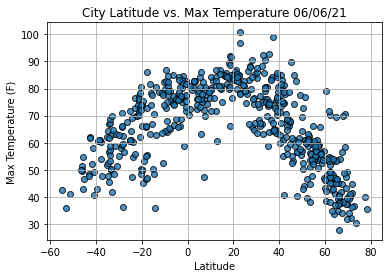

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

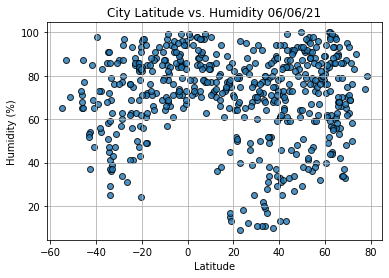

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

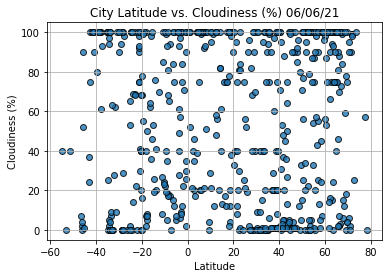

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

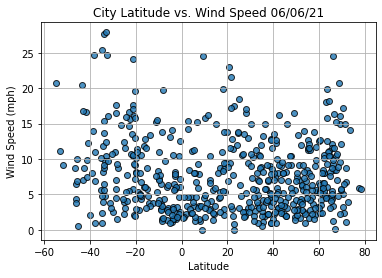

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()